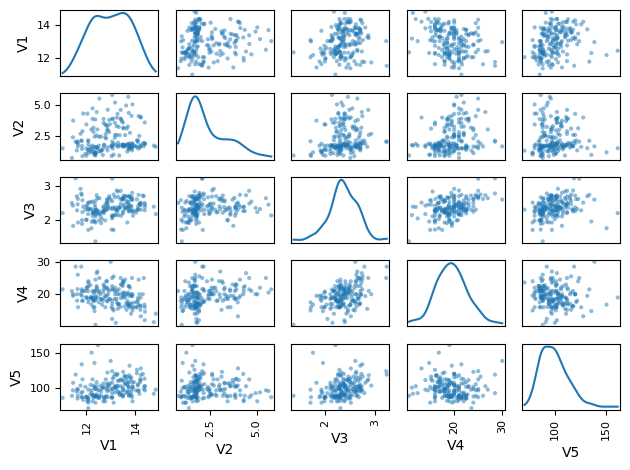

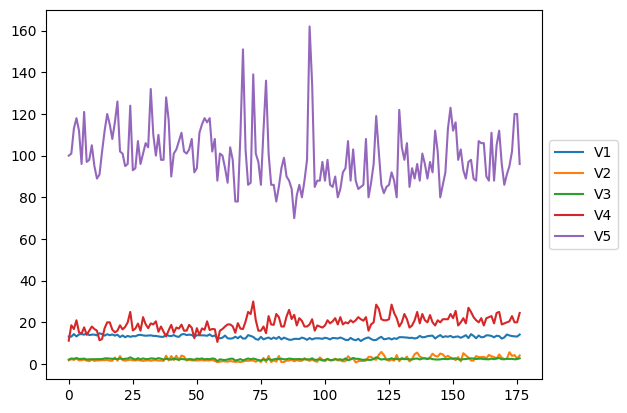

## Means:


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13
Class,,,,,,,,,,,,,
1,13.736379,2.015862,2.456034,17.062069,105.982759,2.840862,2.981034,0.290172,1.892586,5.526379,1.062414,3.144655,1116.586207
2,12.278732,1.932676,2.244789,20.238028,94.549296,2.258873,2.080845,0.363662,1.630282,3.086620,1.056282,2.785352,519.507042
3,13.153750,3.333750,2.437083,21.416667,99.312500,1.678750,0.781458,0.447500,1.153542,7.396250,0.682708,1.683542,629.895833



## Standard deviations:


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13
Class,,,,,,,,,,,,,
1,0.461632,0.693400,0.229124,2.561375,10.224654,0.341880,0.400831,0.070648,0.412419,1.249301,0.117463,0.345504,223.352764
2,0.537964,1.015569,0.315467,3.349770,16.753497,0.545361,0.705701,0.123961,0.602068,0.924929,0.202937,0.496573,157.211220
3,0.530241,1.087906,0.184690,2.258161,10.890473,0.356971,0.293504,0.124140,0.408836,2.310942,0.114441,0.272111,115.097043



## Sample sizes:


Class
1    58
2    71
3    48
dtype: int64

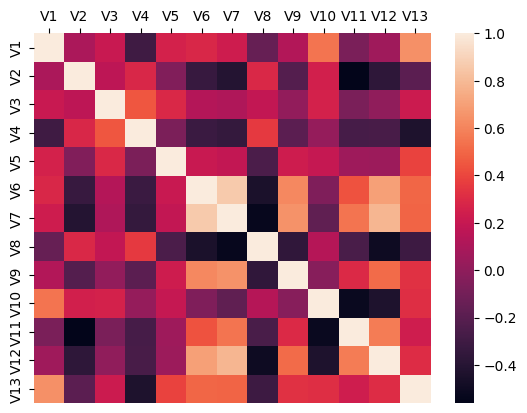

  level_0 level_1  Correlation
0      V7      V6     0.864046
1     V12      V7     0.786372
2     V12      V6     0.699566
3      V9      V7     0.650254
4     V13      V1     0.641068
5      V9      V6     0.610533
6     V12     V11     0.567395
7     V11      V2     0.560854
8     V10      V1     0.547883
9     V11      V7     0.543208
Importance of components:


,Standard deviation,Proportion of Variance,Cumulative Proportion
PC1,2.162822,0.359831,0.359831
PC2,1.581571,0.192413,0.552244
PC3,1.205541,0.111795,0.664038
PC4,0.961480,0.071111,0.735149
PC5,0.928298,0.066287,0.801437
PC6,0.803024,0.049604,0.851040
PC7,0.742955,0.042460,0.893500
PC8,0.592232,0.026980,0.920480
PC9,0.537755,0.022245,0.942725
PC10,0.496798,0.018985,0.961710


Coefficients of linear discriminants:


,LD1,LD2
V1,-0.407338,0.871885
V2,0.171369,0.303614
V3,-0.350833,2.343326
V4,0.155393,-0.147184
V5,-0.003023,-0.000550
V6,0.633363,-0.035701
V7,-1.658807,-0.475118
V8,-1.560674,-1.620100
V9,0.124498,-0.308436
V10,0.355594,0.249242


TypeError: lmplot() got multiple values for argument 'data'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from scipy import stats

# Load data
data = pd.read_csv("wine.csv")
data.columns = ["Class"] + ["V" + str(i) for i in range(1, len(data.columns))]
X = data.drop(columns="Class")
y = data["Class"].astype(str)

# Plotting
pd.plotting.scatter_matrix(X.iloc[:, :5], diagonal="kde")
plt.tight_layout()
plt.show()

X.iloc[:, :5].plot()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

# Summary Statistics
means = X.mean()
stds = X.std()

# Group Statistics
def group_statistics(variables, group_var):
    grouped = variables.groupby(group_var)
    print("## Means:")
    display(grouped.mean())
    print("\n## Standard deviations:")
    display(grouped.std())
    print("\n## Sample sizes:")
    display(grouped.size())

group_statistics(X, y)

# Correlation
corrmat = X.corr()
sns.heatmap(corrmat, vmax=1.0, square=False).xaxis.tick_top()
plt.show()

def most_highly_correlated(df, num_to_report):
    cormatrix = df.corr().abs()
    cormatrix *= np.tril(np.ones(cormatrix.shape), k=-1)
    cormatrix = cormatrix.stack().sort_values(ascending=False)
    return cormatrix.head(num_to_report).reset_index().rename(columns={0: "Correlation"})

print(most_highly_correlated(X, 10))

# PCA
standardised_X = scale(X)
pca = PCA().fit(standardised_X)

def pca_summary(pca, standardized_data):
    summary = pd.DataFrame({
        "Standard deviation": np.std(pca.transform(standardized_data), axis=0),
        "Proportion of Variance": pca.explained_variance_ratio_,
        "Cumulative Proportion": np.cumsum(pca.explained_variance_ratio_)
    }, index=["PC" + str(i + 1) for i in range(len(pca.explained_variance_ratio_))])
    print("Importance of components:")
    display(summary)
    return summary

summary = pca_summary(pca, standardised_X)

# LDA
lda = LinearDiscriminantAnalysis().fit(X, y)

def lda_scalings(lda, X):
    scalings = pd.DataFrame(lda.scalings_, index=X.columns, columns=["LD" + str(i + 1) for i in range(lda.scalings_.shape[1])])
    print("Coefficients of linear discriminants:")
    display(scalings)
    return scalings

lda_scalings(lda, X)

lda_values = pd.DataFrame(lda.transform(X), columns=["LD1", "LD2"]).join(y.rename("Class"))
sns.lmplot("LD1", "LD2", data=lda_values, hue="Class", fit_reg=False)
plt.show()
